# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

# LIBRARIES IMPORT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# IMPORT DATASET

In [2]:
dataset = pd.read_csv('dataset/Facebook_Ads_2.csv', encoding = 'iso-8859-1')

In [3]:
dataset.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [5]:
dataset.head(10)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0


In [6]:
dataset.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

# EXPLORE/ VISUALIZE DATASET / DATA CLEANING

In [7]:
dataset.drop(['Names', 'emails', 'Country'], axis = 1, inplace = True)

dataset.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [8]:
clicked    = dataset[dataset['Clicked']==1]
not_clicked = dataset[dataset['Clicked']==0]

print("Total =", len(dataset))

print("Number of clicked =", len(clicked))
print("Percentage clicked =", 1.*len(clicked)/len(dataset)*100.0, "%")
 
print("Did not clicked =", len(not_clicked))
print("Percentage who did not clicked =", 1.*len(not_clicked)/len(dataset)*100.0, "%")

Total = 499
Number of clicked = 250
Percentage clicked = 50.1002004008016 %
Did not clicked = 249
Percentage who did not clicked = 49.899799599198396 %


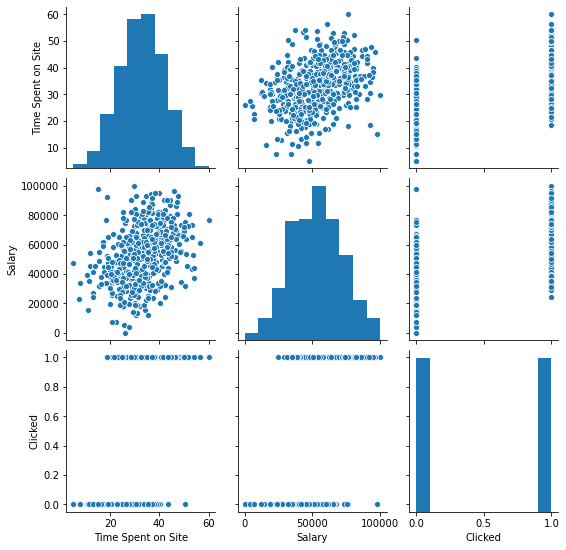

In [9]:
sns.pairplot(dataset)

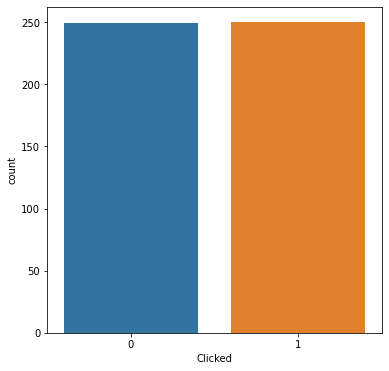

In [10]:
plt.figure(figsize=[6,6])
sns.countplot(x = 'Clicked', data = dataset)

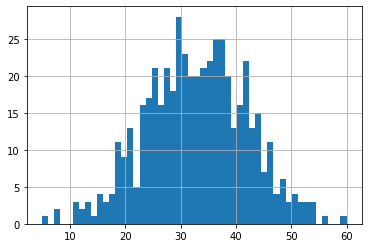

In [11]:
dataset['Time Spent on Site'].hist(bins = 50)

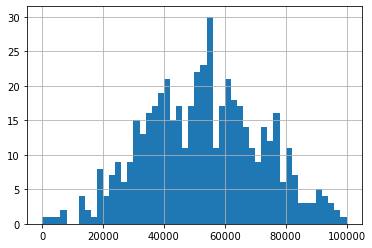

In [12]:
dataset['Salary'].hist(bins = 50)

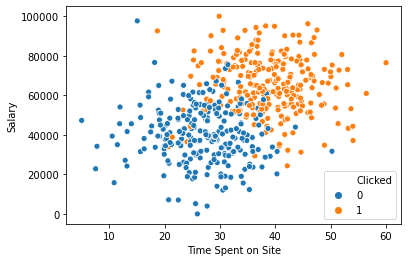

In [13]:
sns.scatterplot(x = 'Time Spent on Site', y = 'Salary', hue = 'Clicked', data = dataset)

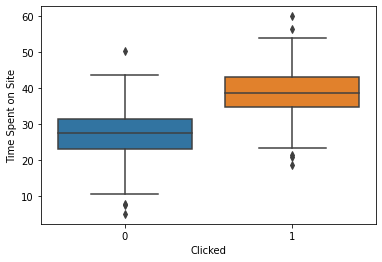

In [14]:
sns.boxplot(x = 'Clicked', y = 'Time Spent on Site', data = dataset)

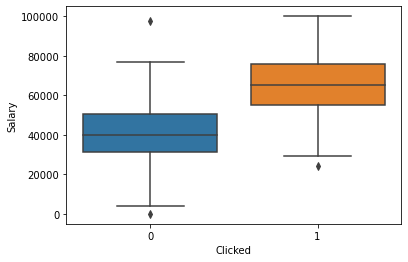

In [15]:
sns.boxplot(x = 'Clicked', y = 'Salary', data = dataset)

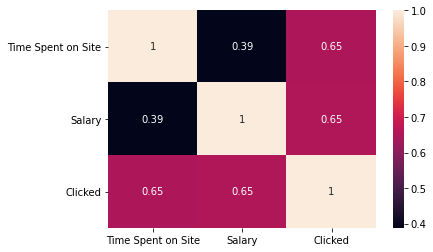

In [16]:
sns.heatmap(dataset.corr(), annot = True)

# PREPARE THE DATA FOR TRAINING

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
X = dataset.drop(['Clicked'], axis = 1).values
y = dataset['Clicked'].values

print(X.shape, y.shape)

(499, 2) (499,)


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-7.99457658e-01  1.28257713e-01]
 [-5.10286870e-02  1.37859159e+00]
 [-1.31666684e+00 -6.21944817e-01]
 [ 2.32223270e+00 -8.30443624e-01]
 [ 1.46195572e-01 -8.19280959e-01]
 [ 2.09908496e+00  1.46259598e+00]
 [ 1.09531908e+00  4.75030899e-01]
 [-7.96458904e-01 -1.21483411e+00]
 [ 8.55264296e-01 -9.81324726e-01]
 [-3.55476114e-01 -6.21930555e-01]
 [ 3.87487311e-02  6.48400206e-02]
 [ 1.77112538e-01 -1.19530208e+00]
 [-8.36398567e-01 -4.81440402e-01]
 [ 1.49769499e+00 -2.23166322e-01]
 [ 5.27406027e-01  6.21976462e-01]
 [-8.64648371e-01 -1.85222918e+00]
 [ 8.98997888e-01 -1.81000774e-01]
 [-8.97110238e-01 -7.59750031e-01]
 [ 1.75384005e+00 -9.55319376e-01]
 [-5.59287751e-01 -6.60247498e-02]
 [-1.73917217e+00  4.62029789e-01]
 [-8.05159264e-01  3.86803184e-02]
 [ 1.02580543e+00 -1.09023371e+00]
 [ 4.63557430e-01 -6.13245268e-02]
 [-5.24576689e-02 -6.42743290e-02]
 [-1.42764854e+00 -9.82238280e-01]
 [ 7.58754335e-01  9.28106741e-01]
 [-2.40954941e-01  7.44605776e-01]
 [-9.76058419e-01 -8

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(399, 2) (399,)
(100, 2) (100,)


# MODEL TRAINING

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier = LogisticRegression(random_state = 3)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=3)

# MODEL TESTING

In [23]:
y_predict = classifier.predict(X_test)

print(y_predict)

[1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1]


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

### Test data reporting

[[47  2]
 [ 3 48]]
           Predicted:0  Predicted:1
Clicked:0           47            2
Clicked:1            3           48


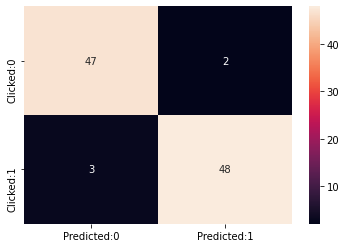

In [25]:
cm = confusion_matrix(y_test, y_predict)
print(cm)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Clicked:0','Clicked:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True)

In [26]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        51

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



### Train data reporting

           Predicted:0  Predicted:1
Clicked:0          181           19
Clicked:1           17          182
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        51

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



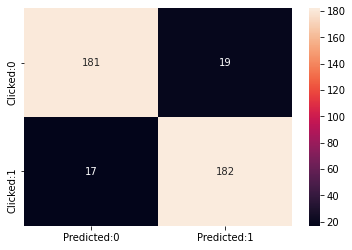

In [27]:
y_predict_train = classifier.predict(X_train)

cm = confusion_matrix(y_train, y_predict_train)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Clicked:0','Clicked:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
print(classification_report(y_test, y_predict))

### All data reporting

           Predicted:0  Predicted:1
Clicked:0          228           21
Clicked:1           20          230
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.96      0.94      0.95        51

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



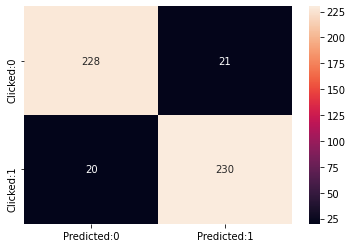

In [28]:
y_predict_all = classifier.predict(X_scaled)

cm = confusion_matrix(y, y_predict_all)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Clicked:0','Clicked:1'])
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
print(classification_report(y_test, y_predict))

# VISUALIZING TRAINING AND TESTING DATASETS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


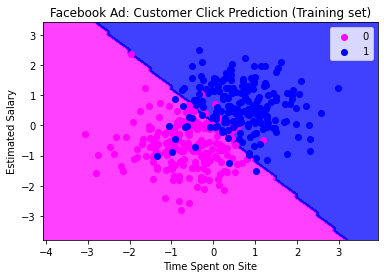

In [29]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


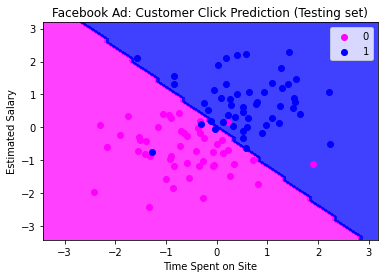

In [30]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

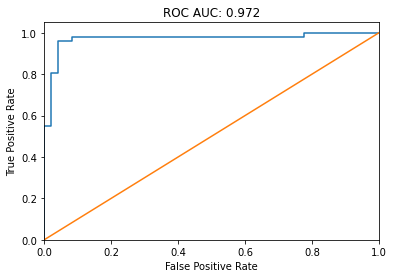

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

prediction = classifier.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prediction)
auc_score = roc_auc_score(y_test, prediction)

plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC: {:.3f}'.format(auc_score))
plt.show()